In [2]:
import pandas as pd

# 載入資料
data = pd.read_csv("affairs.csv")

# 檢查資料內容
print(data.head())


   affairs  gender   age  yearsmarried children  religiousness  education  \
0       12  female  32.0          10.0      yes              3         17   
1       12    male  37.0          15.0      yes              4         14   
2       12  female  42.0          15.0      yes              5          9   
3       12    male  37.0          10.0      yes              2         20   
4       12  female  32.0          15.0      yes              3         14   

   occupation  rating  
0           5       2  
1           5       2  
2           4       1  
3           6       2  
4           1       2  


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 轉換類別變數為數值格式
data['gender'] = data['gender'].map({'male': 0, 'female': 1})
data['children'] = data['children'].map({'no': 0, 'yes': 1})

# 分割特徵與目標變數
X = data.drop(columns=['affairs'])  # 特徵
y = (data['affairs'] > 0).astype(int)  # 將 affairs 轉換為二元分類問題

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化特徵
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 建立 SVM 模型，使用 RBF 核
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# 訓練模型
svm_rbf.fit(X_train, y_train)

# 預測測試集
y_pred = svm_rbf.predict(X_test)


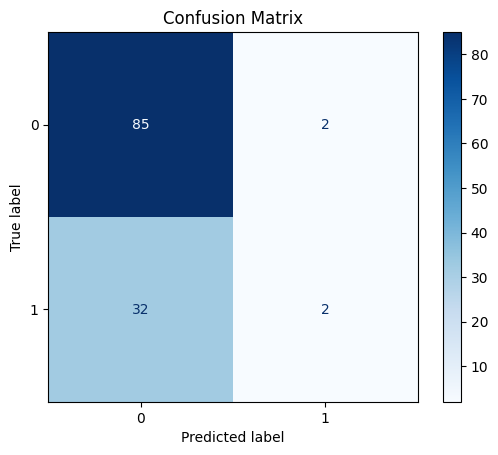

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 生成混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 使用 ConfusionMatrixDisplay 視覺化
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


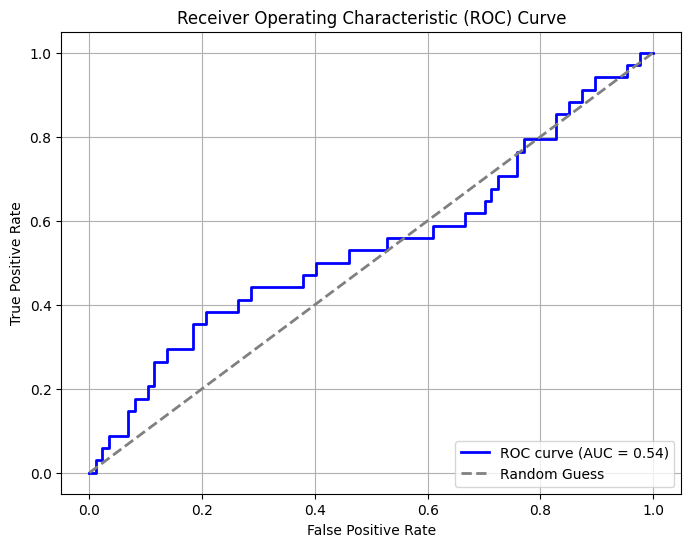

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 計算預測機率分數
y_score = svm_rbf.decision_function(X_test)

# 計算 ROC 曲線和 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [5]:
# 評估模型效能
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.71900826446281

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.83        87
           1       0.50      0.06      0.11        34

    accuracy                           0.72       121
   macro avg       0.61      0.52      0.47       121
weighted avg       0.66      0.72      0.63       121



In [6]:
from sklearn.model_selection import GridSearchCV

# 定義超參數範圍
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# 網格搜索
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# 最佳參數
print("Best Parameters:", grid.best_params_)

# 使用最佳參數進行預測
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

# 評估效能
print("Accuracy with Best Parameters:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01